In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.load('../../data/quark_gluon_dataset/quark_gluon_20000_1.npz', allow_pickle=True)

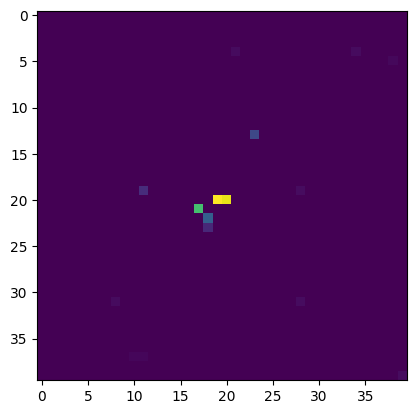

In [3]:
plt.imshow(data["x_train"][0,:,:,0])

In [4]:
# 4th channel from overlay of the 3 channels
def add_fourth_channel(images):
    images_with_four_channels = []
    for image in images:
        superimposed_channel = np.mean(image, axis=2, keepdims=True)
        image_with_four_channels = np.concatenate((image, superimposed_channel), axis=2)
        images_with_four_channels.append(image_with_four_channels)
    return np.array(images_with_four_channels)

In [5]:
images = data["x_train"]
images = add_fourth_channel(images)

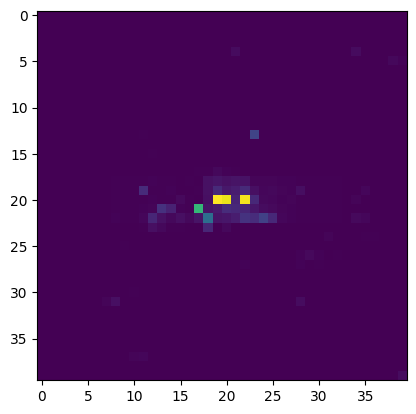

In [6]:
plt.imshow(images[0,:,:,3])

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Soft Transformations

def rotate_image(image, angle):
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h))
    return rotated

def translate_image(image, x, y):
    M = np.float32([[1, 0, x], [0, 1, y]])
    shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
    return shifted

def scale_image(image, scale_factor):
    h, w = image.shape[:2]
    resized = cv2.resize(image, (int(w * scale_factor), int(h * scale_factor)))
    return resized

def shear_image(image, shear_factor):
    M = np.float32([[1, shear_factor, 0], [0, 1, 0]])
    sheared = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
    return sheared

def adjust_brightness(image, brightness_factor):
    hsv = cv2.cvtColor(image[:, :, :3], cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    v = cv2.add(v, brightness_factor)
    v[v > 255] = 255
    v[v < 0] = 0
    final_hsv = cv2.merge((h, s, v))
    image_bright = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    image[:, :, :3] = image_bright
    return image

def add_noise(image, noise_factor):
    row, col, ch = image.shape
    mean = 0
    sigma = noise_factor ** 0.5
    gauss = np.random.normal(mean, sigma, (row, col, ch))
    gauss = gauss.reshape(row, col, ch)
    noisy = image + gauss
    return noisy

# collinear transformations

def affine_transform(image, pts1, pts2):
    M = cv2.getAffineTransform(pts1, pts2)
    rows, cols, ch = image.shape
    affine_transformed = cv2.warpAffine(image, M, (cols, rows))
    return affine_transformed

def perspective_transform(image, pts1, pts2):
    M = cv2.getPerspectiveTransform(pts1, pts2)
    rows, cols, ch = image.shape
    perspective_transformed = cv2.warpPerspective(image, M, (cols, rows))
    return perspective_transformed


In [8]:
def visualize_transformations(image):
    # Original image
    plt.figure(figsize=(10, 10))
    plt.subplot(3, 3, 1)
    plt.imshow(cv2.cvtColor(image[:, :, :3], cv2.COLOR_BGR2RGB))
    plt.title('Original')
    plt.axis('off')

    # Rotation
    rotated_image = rotate_image(image, 15)
    plt.subplot(3, 3, 2)
    plt.imshow(cv2.cvtColor(rotated_image[:, :, :3], cv2.COLOR_BGR2RGB))
    plt.title('Rotated')
    plt.axis('off')

    # Translation
    translated_image = translate_image(image, 10, 20)
    plt.subplot(3, 3, 3)
    plt.imshow(cv2.cvtColor(translated_image[:, :, :3], cv2.COLOR_BGR2RGB))
    plt.title('Translated')
    plt.axis('off')

    # Scaling
    scaled_image = scale_image(image, 1.2)
    plt.subplot(3, 3, 4)
    plt.imshow(cv2.cvtColor(scaled_image[:, :, :3], cv2.COLOR_BGR2RGB))
    plt.title('Scaled')
    plt.axis('off')

    # Shearing
    sheared_image = shear_image(image, 0.2)
    plt.subplot(3, 3, 5)
    plt.imshow(cv2.cvtColor(sheared_image[:, :, :3], cv2.COLOR_BGR2RGB))
    plt.title('Sheared')
    plt.axis('off')

    # Brightness Adjustment
    bright_image = adjust_brightness(image, 50)
    plt.subplot(3, 3, 6)
    plt.imshow(cv2.cvtColor(bright_image[:, :, :3], cv2.COLOR_BGR2RGB))
    plt.title('Brightness Adjusted')
    plt.axis('off')

    # Noise Addition
    # noisy_image = add_noise(image, 0.05)
    # plt.subplot(3, 3, 7)
    # plt.imshow(cv2.cvtColor(noisy_image[:, :, :3], cv2.COLOR_BGR2RGB))
    # plt.title('Noisy')
    # plt.axis('off')

    # Affine Transformation
    pts1 = np.float32([[50, 50], [200, 50], [50, 200]])
    pts2 = np.float32([[10, 100], [200, 50], [100, 250]])
    affine_image = affine_transform(image, pts1, pts2)
    plt.subplot(3, 3, 8)
    plt.imshow(cv2.cvtColor(affine_image[:, :, :3], cv2.COLOR_BGR2RGB))
    plt.title('Affine Transformed')
    plt.axis('off')

    # Perspective Transformation
    pts1 = np.float32([[56, 65], [368, 52], [28, 387], [389, 390]])
    pts2 = np.float32([[0, 0], [300, 0], [0, 300], [300, 300]])
    perspective_image = perspective_transform(image, pts1, pts2)
    plt.subplot(3, 3, 9)
    plt.imshow(cv2.cvtColor(perspective_image[:, :, :3], cv2.COLOR_BGR2RGB))
    plt.title('Perspective Transformed')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

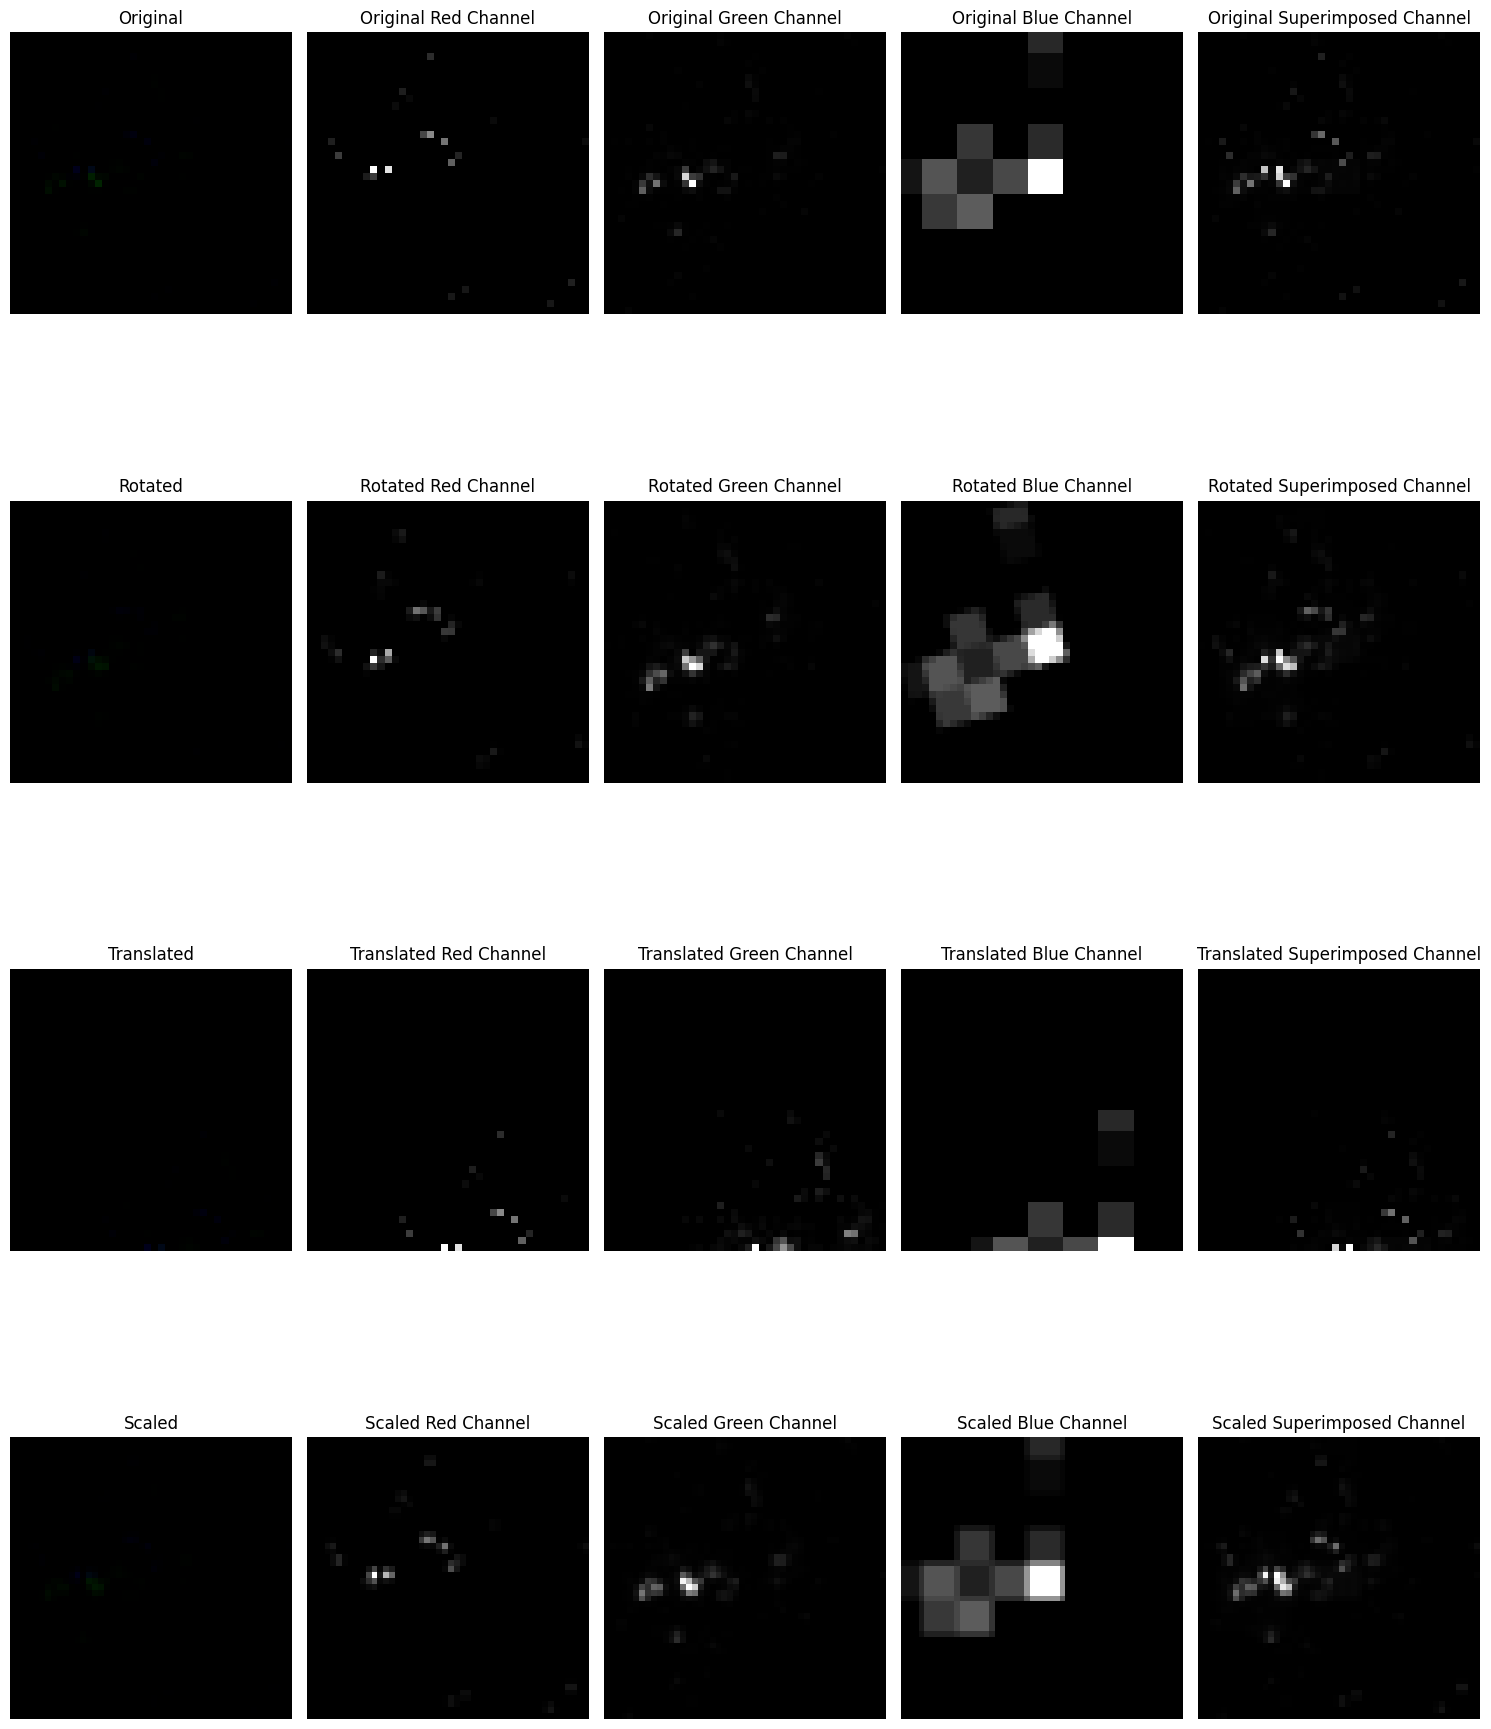

In [10]:
def visualize_transformations(image):
    # Prepare the plot
    plt.figure(figsize=(15, 20))

    # Titles for each channel visualization
    channels_titles = ['Red Channel', 'Green Channel', 'Blue Channel', 'Superimposed Channel']

    # Original image and its channels
    plt.subplot(4, 5, 1)
    plt.imshow(cv2.cvtColor(image[:, :, :3], cv2.COLOR_BGR2RGB))
    plt.title('Original')
    plt.axis('off')
    
    for i in range(4):
        plt.subplot(4, 5, 2 + i)
        plt.imshow(image[:, :, i], cmap='gray')
        plt.title(f'Original {channels_titles[i]}')
        plt.axis('off')

    # Rotate
    rotated_image = rotate_image(image, 15)
    plt.subplot(4, 5, 6)
    plt.imshow(cv2.cvtColor(rotated_image[:, :, :3], cv2.COLOR_BGR2RGB))
    plt.title('Rotated')
    plt.axis('off')
    
    for i in range(4):
        plt.subplot(4, 5, 7 + i)
        plt.imshow(rotated_image[:, :, i], cmap='gray')
        plt.title(f'Rotated {channels_titles[i]}')
        plt.axis('off')

    # Translate
    translated_image = translate_image(image, 10, 20)
    plt.subplot(4, 5, 11)
    plt.imshow(cv2.cvtColor(translated_image[:, :, :3], cv2.COLOR_BGR2RGB))
    plt.title('Translated')
    plt.axis('off')
    
    for i in range(4):
        plt.subplot(4, 5, 12 + i)
        plt.imshow(translated_image[:, :, i], cmap='gray')
        plt.title(f'Translated {channels_titles[i]}')
        plt.axis('off')

    # Scale
    scaled_image = scale_image(image, 1.2)
    plt.subplot(4, 5, 16)
    plt.imshow(cv2.cvtColor(scaled_image[:, :, :3], cv2.COLOR_BGR2RGB))
    plt.title('Scaled')
    plt.axis('off')
    
    for i in range(4):
        plt.subplot(4, 5, 17 + i)
        plt.imshow(scaled_image[:, :, i], cmap='gray')
        plt.title(f'Scaled {channels_titles[i]}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Visualize transformations on the first image
visualize_transformations(images[2])


1123.4878376436632
0.25479442


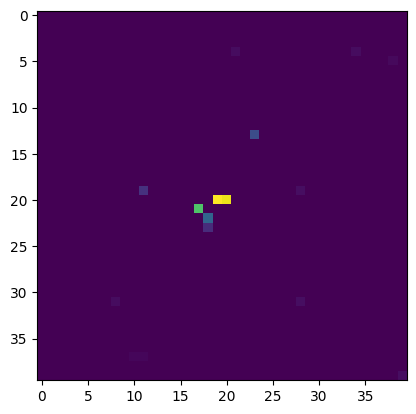

In [11]:
image = data["x_train"][0,:,:,0]
c = 255 / np.log(1 + np.max(image)) 
print(c)
print(np.max(image))
log_image = c * (np.log(image + 1)) 
plt.imshow(log_image)

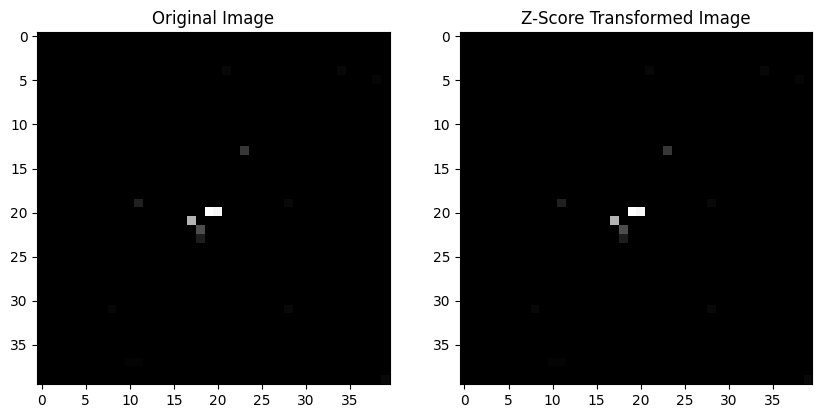

In [12]:
# Z-score normalisation
import cv2

# If the image is not grayscale, convert it (assuming the image is in RGB)
if len(image.shape) == 3 and image.shape[2] == 3:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Calculate the mean and standard deviation
mean = np.mean(image)
std = np.std(image)

# Apply the z-score transformation
z_score_transformed = (image - mean) / std

# Normalize the transformed values to 0-255
normalized_transformed = cv2.normalize(z_score_transformed, None, 0, 255, cv2.NORM_MINMAX)

# Convert to uint8
normalized_transformed = normalized_transformed.astype(np.uint8)

# Display the original and transformed images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Z-Score Transformed Image')
plt.imshow(normalized_transformed, cmap='gray')
plt.show()

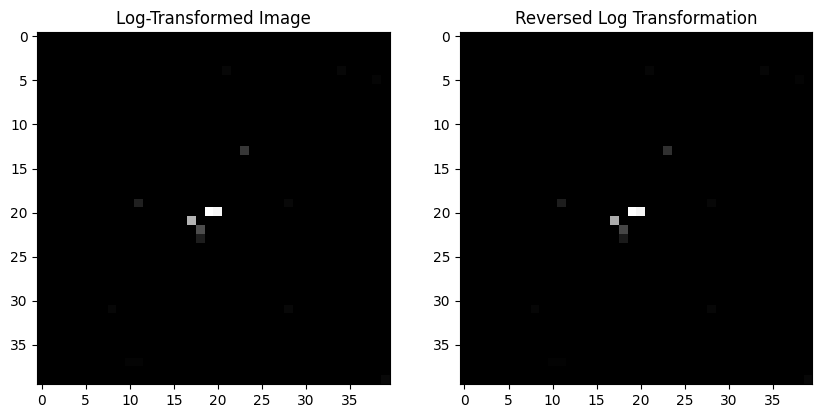

In [13]:
# Reverse log transformation
reversed_image = np.exp(image)

# Normalize the transformed values to 0-255
normalized_reversed = cv2.normalize(reversed_image, None, 0, 255, cv2.NORM_MINMAX)

# Convert to uint8
normalized_reversed = normalized_reversed.astype(np.uint8)

# Display the log-transformed and reversed images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Log-Transformed Image')
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Reversed Log Transformation')
plt.imshow(normalized_reversed, cmap='gray')
plt.show()

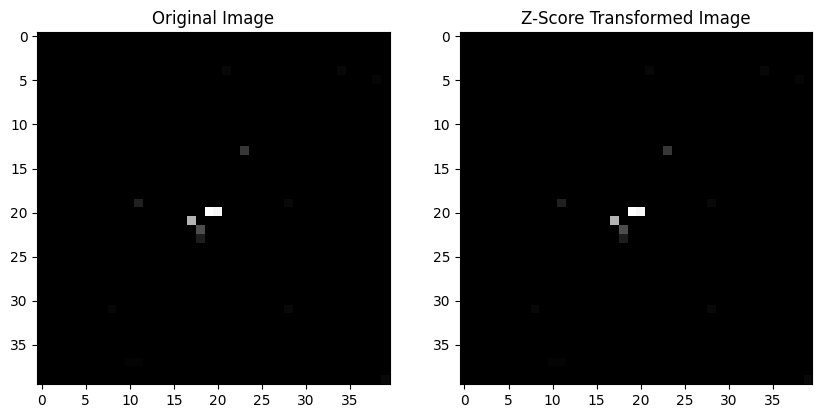

In [14]:
# Calculate the mean and standard deviation
mean = np.mean(image)
std = np.std(image)

# Apply the z-score transformation
z_score_transformed = (image - mean) / std

# Normalize the transformed values to 0-255
normalized_transformed = cv2.normalize(z_score_transformed, None, 0, 255, cv2.NORM_MINMAX)

# Convert to uint8
normalized_transformed = normalized_transformed.astype(np.uint8)

# Display the original and transformed images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Z-Score Transformed Image')
plt.imshow(normalized_transformed, cmap='gray')
plt.show()


In [15]:
# Plots of means of channels
def plot(channel=0):
    fig2 = plt.figure(figsize=(10,10))
    r = 1
    c = 2
    index = [np.where(data['y_train'] == 0)[0], np.where(data['y_train'] == 1)[0]]
    for i in range(2):
        fig2.add_subplot(r,c,i+1)
        plt.imshow(np.log(np.mean(data['x_train'][index[i],:,:,channel], axis=0)))
        plt.title('Quark' if i == 0 else 'Gluon')

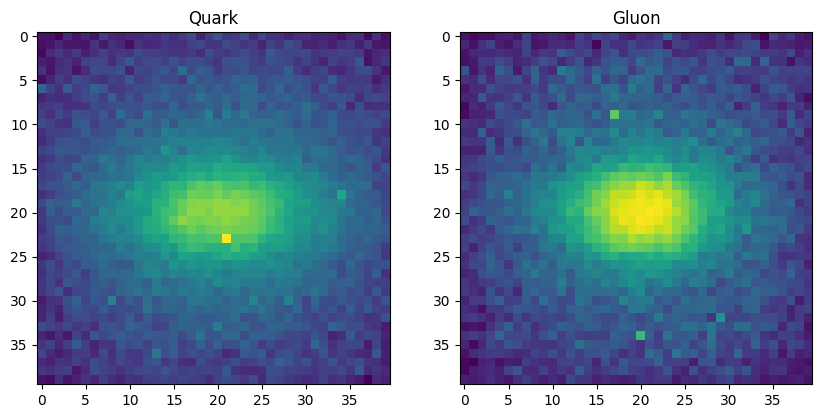

In [16]:
plot()

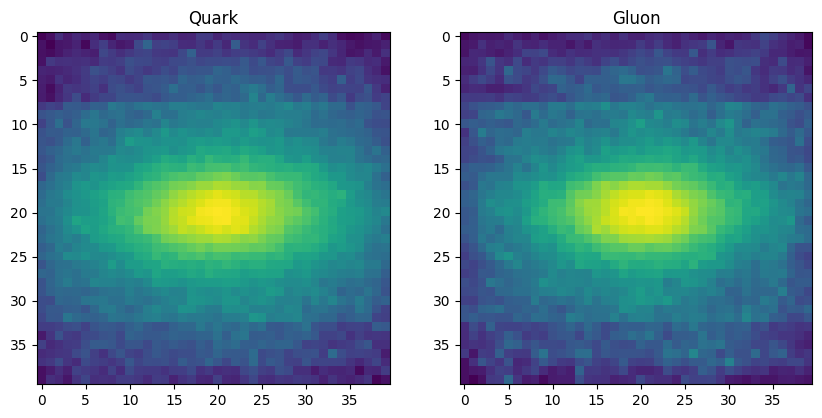

In [17]:
plot(channel=1)

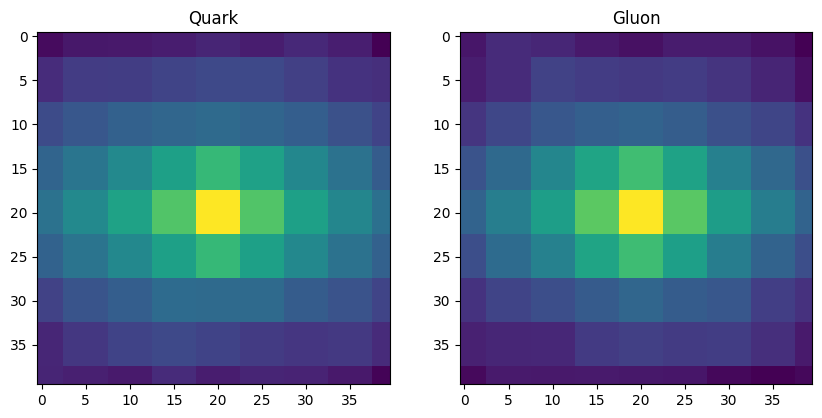

In [18]:
plot(channel=2)

In [19]:
# Heatmaps
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def compute_relative_difference(images):
    # Compute the average image
    avgs = np.mean(images, axis=0)
    
    # Compute the relative difference
    relative_diffs = np.zeros_like(avgs)
    
    for img in images:
        relative_diffs += np.abs(img - avgs) / (avgs + 1e-10)  # Adding a small constant to avoid division by zero
    
    relative_diffs /= len(images)
    
    return relative_diffs

def plot_heatmaps(relative_diffs):
    h, w, c = relative_diffs.shape
    for i in range(c):
        plt.figure(figsize=(10, 8))
        sns.heatmap(relative_diffs[:, :, i], cmap="viridis")
        plt.title(f'Channel {i+1} Sensitivity Heatmap')
        plt.show()

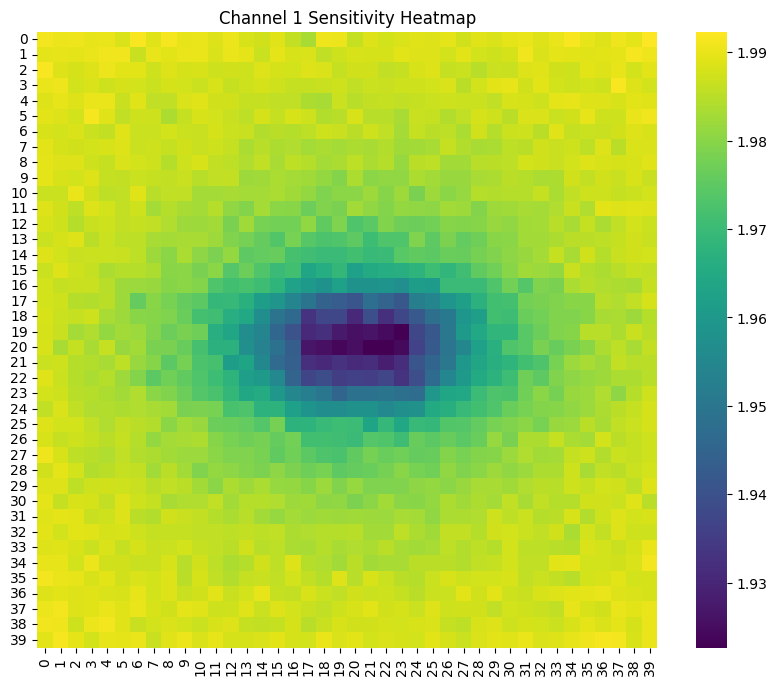

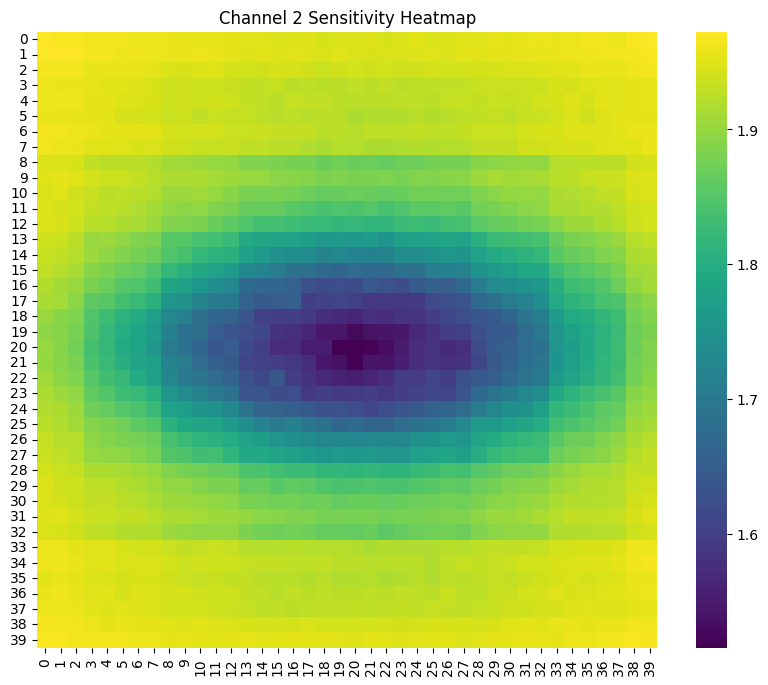

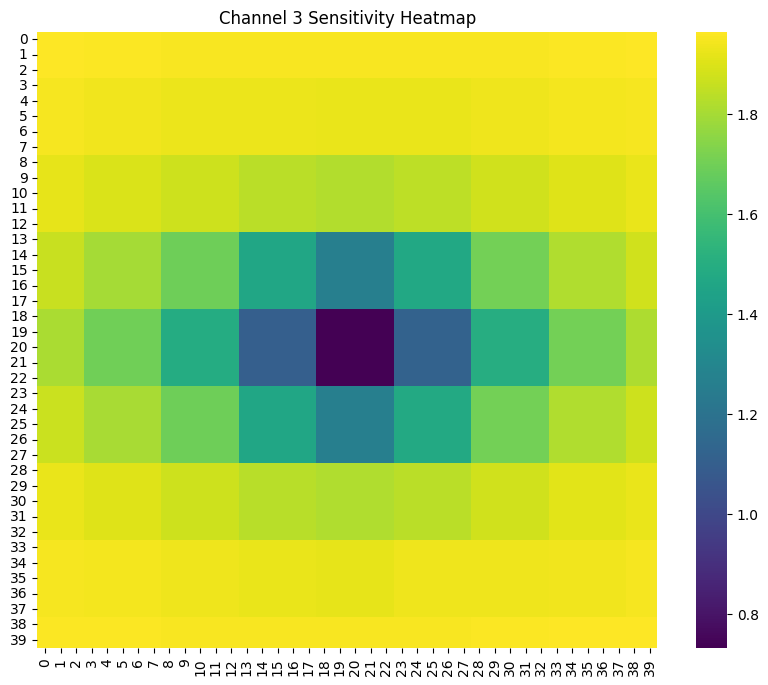

In [20]:
images = data['x_train']
relative_diffs = compute_relative_difference(images)
plot_heatmaps(relative_diffs)

In [21]:
def filter_labels(images, labels, label):
    filter_mask = np.isin(labels, [label])
    return images[filter_mask]

In [22]:
print(images.shape)
images_0 = filter_labels(images, data['y_train'], 0)
print(images_0.shape)
images_1 = filter_labels(images, data['y_train'], 1)
print(images_1.shape)

(18000, 40, 40, 3)
(8995, 40, 40, 3)
(9005, 40, 40, 3)


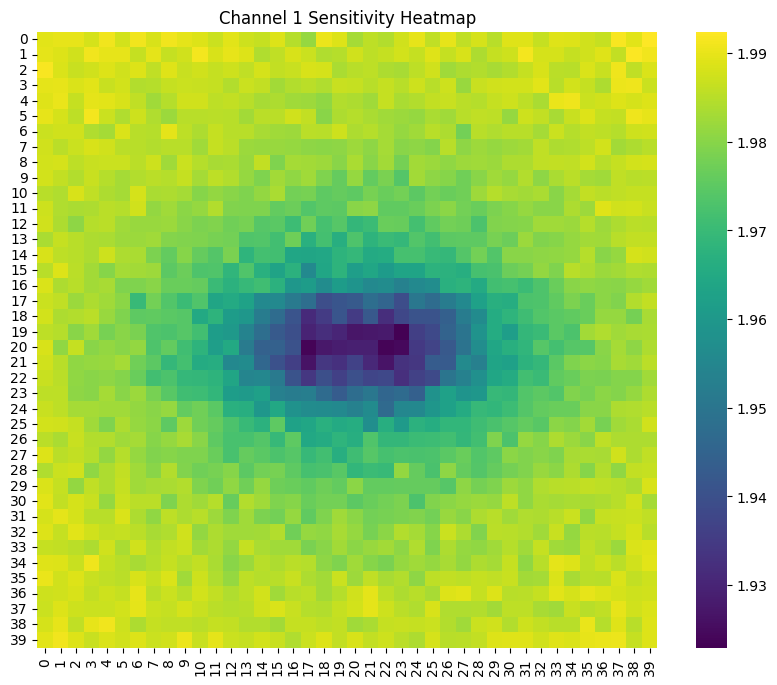

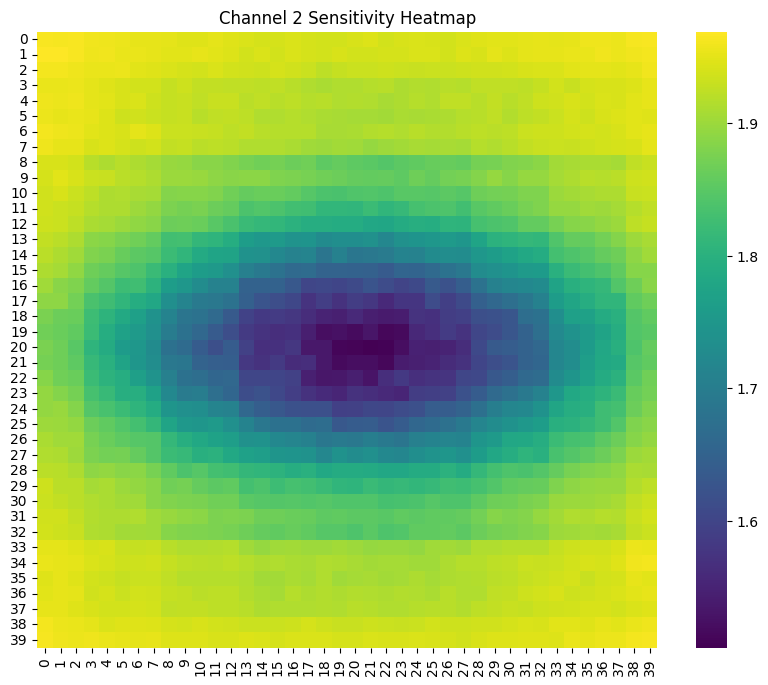

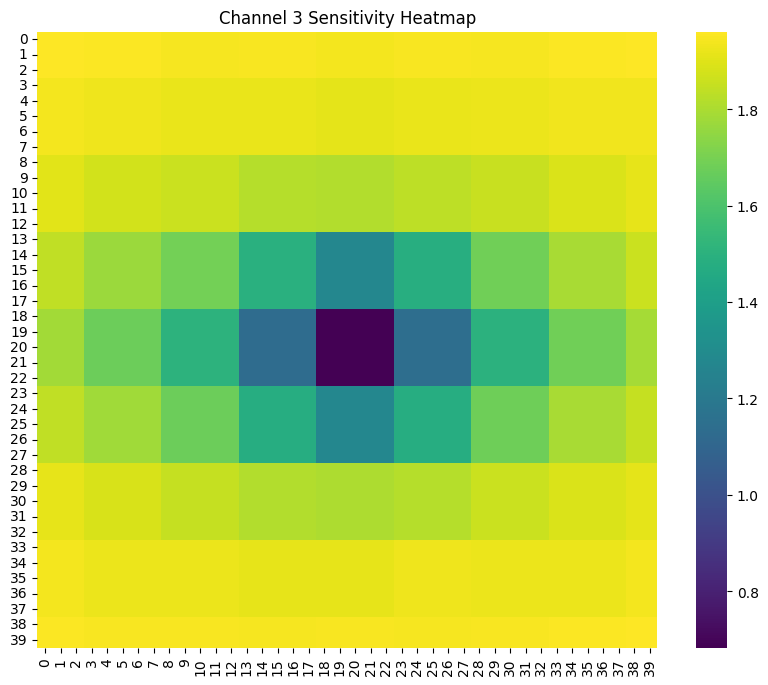

In [23]:
relative_diffs_0 = compute_relative_difference(images_0)
plot_heatmaps(relative_diffs_0)

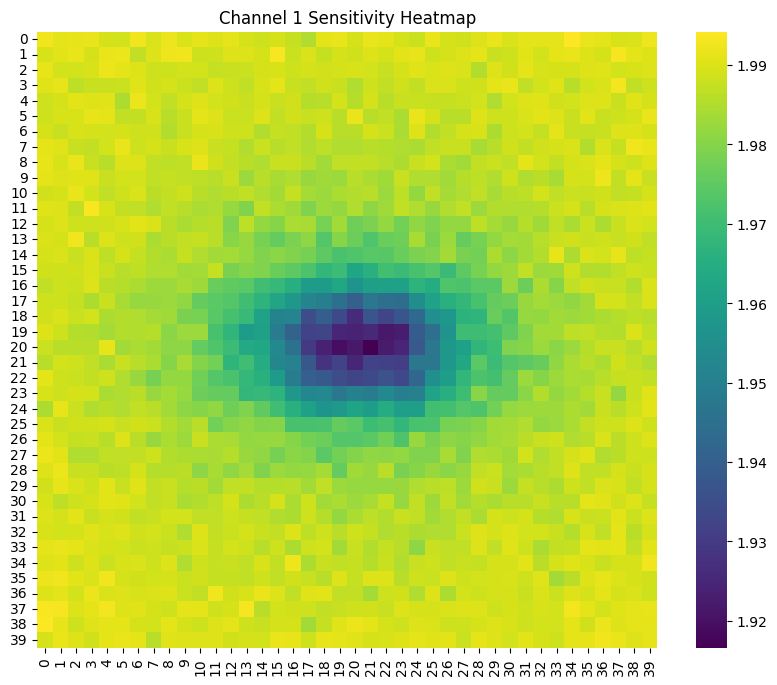

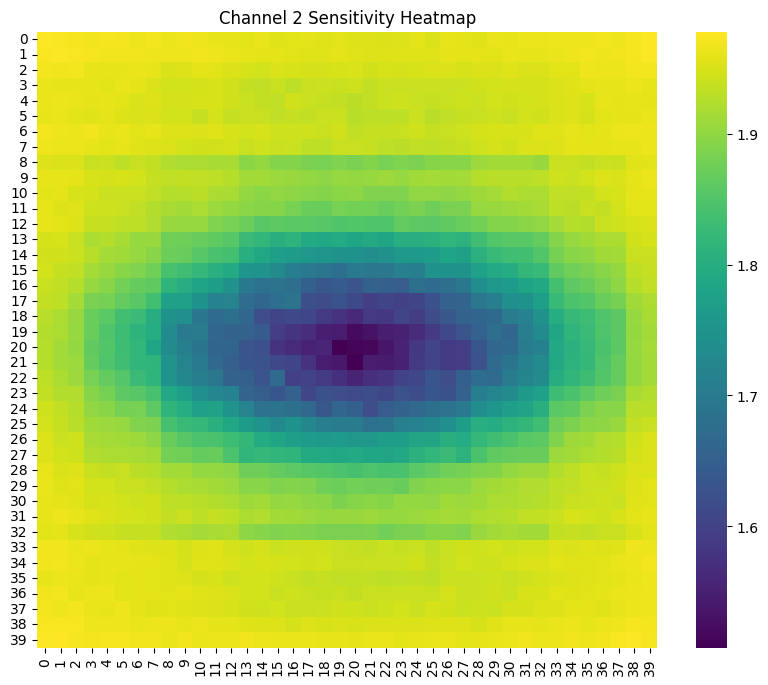

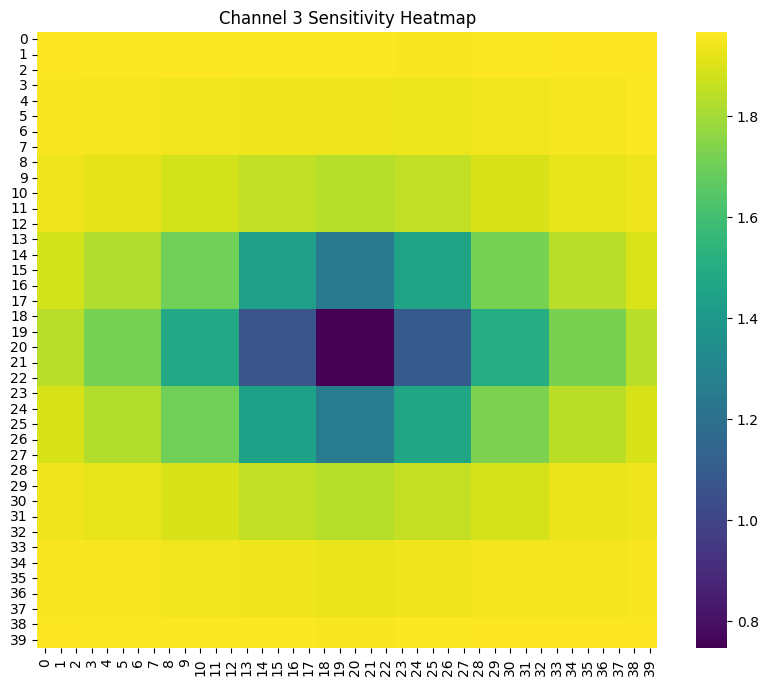

In [24]:
relative_diffs_1 = compute_relative_difference(images_1)
plot_heatmaps(relative_diffs_1)

In [25]:
x_train = data["x_train"]
y_train = data["y_train"]
x_test = data["x_test"]
y_test = data["y_test"]

print(f"Data Loading: x_train shape {x_train.shape}, x_test shape: {x_test.shape}")
print(f"Data Loading: y_train shape {y_train.shape}, y_test shape: {y_test.shape}")

Data Loading: x_train shape (18000, 40, 40, 3), x_test shape: (2000, 40, 40, 3)
Data Loading: y_train shape (18000,), y_test shape: (2000,)


In [26]:
# Log transformation of the 4th channel
import numpy as np

def preprocess_4th_channel(image):    
    if image.shape[-1] < 3:
        raise ValueError("Image must have at least 4 channels.")

    # Extract the 4th channel
    fourth_channel = image[:, :, 3]

    # Apply logarithmic transformation
    transformed_channel = np.log(np.abs(fourth_channel) + 1e-6)

    # Normalize the transformed channel
    normalized_channel = (transformed_channel - transformed_channel.min()) / (transformed_channel.max() - transformed_channel.min() + 1e-6)

    return normalized_channel

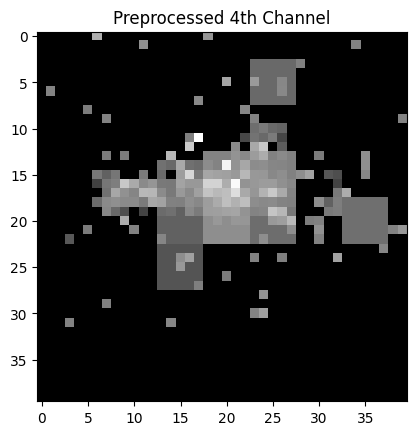

In [27]:
images = add_fourth_channel(images)
preprocessed_4th_channel = preprocess_4th_channel(images[8])
plt.imshow(preprocessed_4th_channel, cmap='gray')
plt.title('Preprocessed 4th Channel')
plt.show()

In [28]:
import numpy as np

def preprocess_all_images(images):
    if images.shape[-1] < 4:
        raise ValueError("Each image must have at least 4 channels.")

    # Extract the 4th channels from all images
    fourth_channels = images[:, :, :, 3]

    # Apply logarithmic transformation and normalization to the 4th channels
    transformed_channels = np.log(np.abs(fourth_channels) + 1e-6)
    min_vals = transformed_channels.min(axis=(1, 2), keepdims=True)
    max_vals = transformed_channels.max(axis=(1, 2), keepdims=True)
    normalized_channels = (transformed_channels - min_vals) / (max_vals - min_vals + 1e-6)

    return normalized_channels

In [29]:
# Plotting Samples 
def plot_image_grid_superimposed(data, label, channel=0, rows=5, cols=5):
    fig, axes = plt.subplots(rows, cols, figsize=(10, 10))
    for i in range(rows):
        for j in range(cols):
            # axes[i, j].imshow(data[i * cols + j, :, :, channel])
            axes[i, j].imshow(data[i * cols + j, :, :, 3])
            axes[i, j].axis('off')
    plt.suptitle(f'{label}')
    plt.show()

In [30]:
def plot_image_grid(data, label, channel=0, rows=5, cols=5):
    fig, axes = plt.subplots(rows, cols, figsize=(10, 10))
    for i in range(rows):
        for j in range(cols):
            axes[i, j].imshow(data[i * cols + j, :, :, channel])
            axes[i, j].axis('off')
    plt.suptitle(f'{label}')
    plt.show()

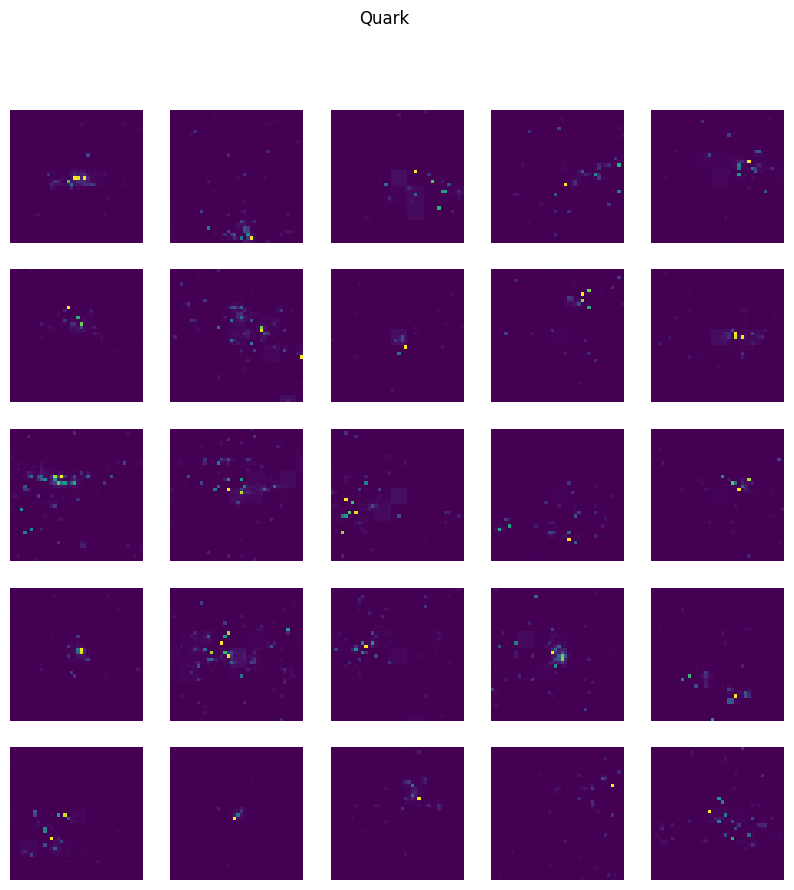

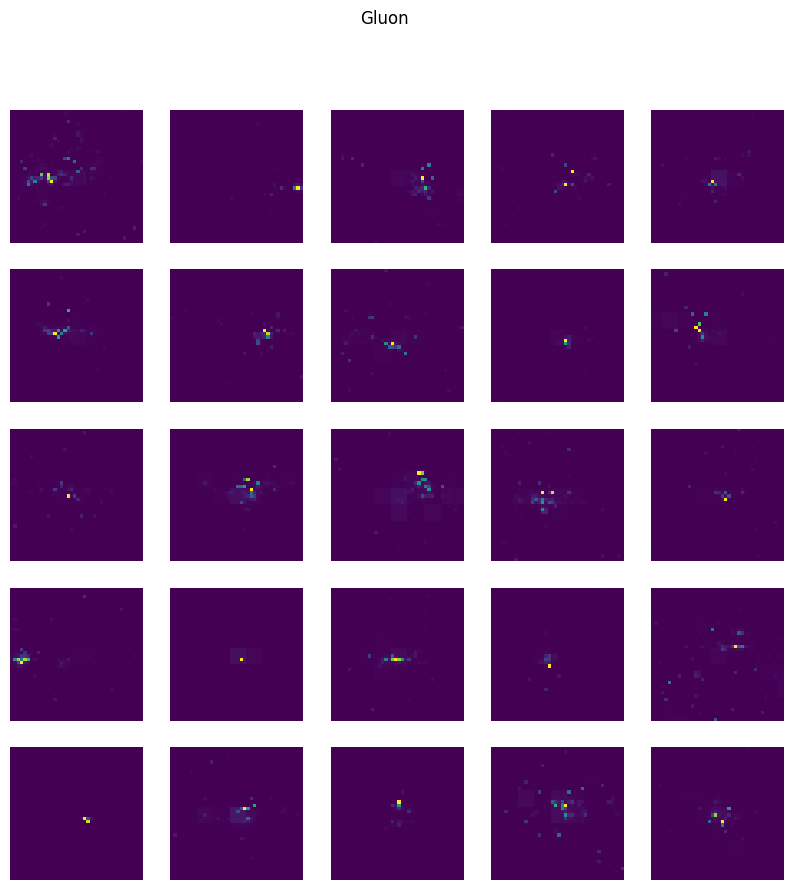

In [32]:
images_0 = add_fourth_channel(images_0)
images_1 = add_fourth_channel(images_1)
plot_image_grid_superimposed(images_0, "Quark")
plot_image_grid_superimposed(images_1, "Gluon")

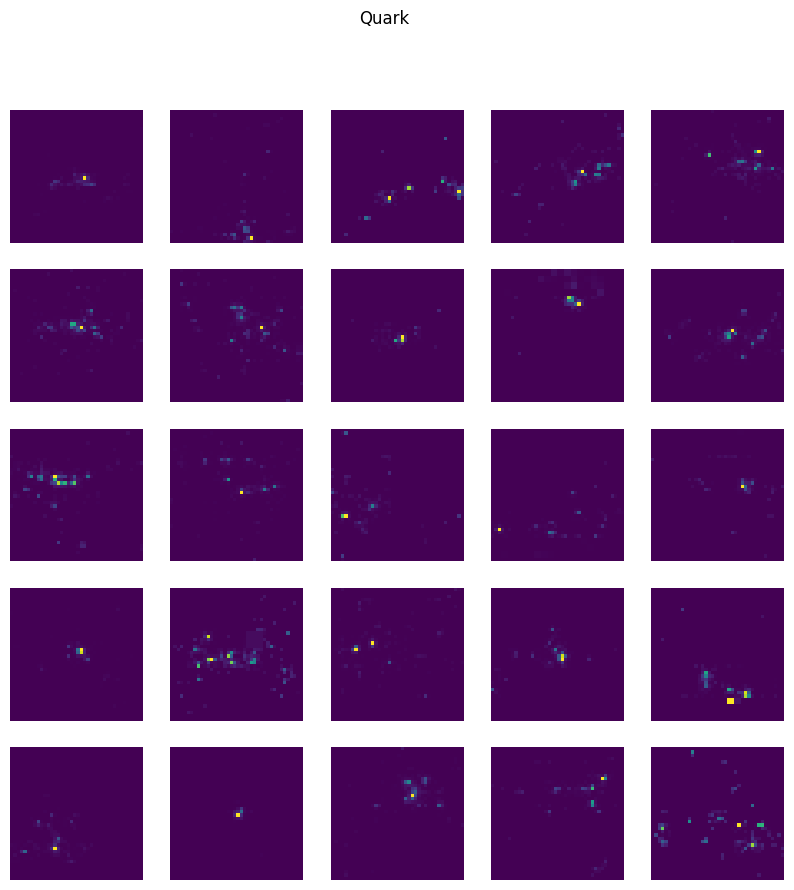

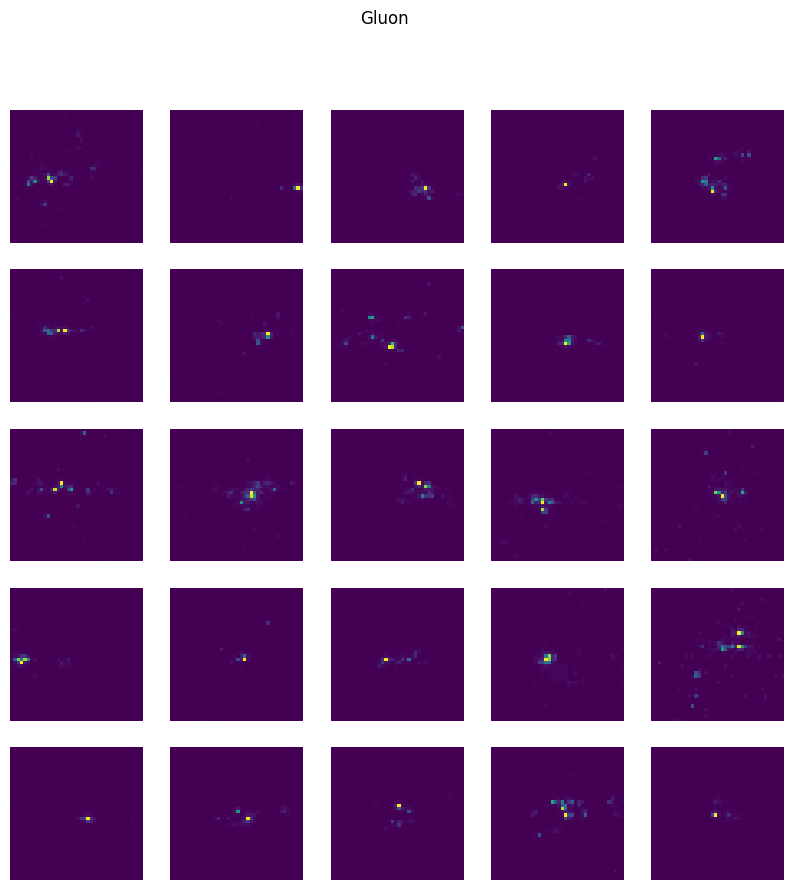

In [33]:
plot_image_grid(images_0, "Quark", 1)
plot_image_grid(images_1, "Gluon", 1)

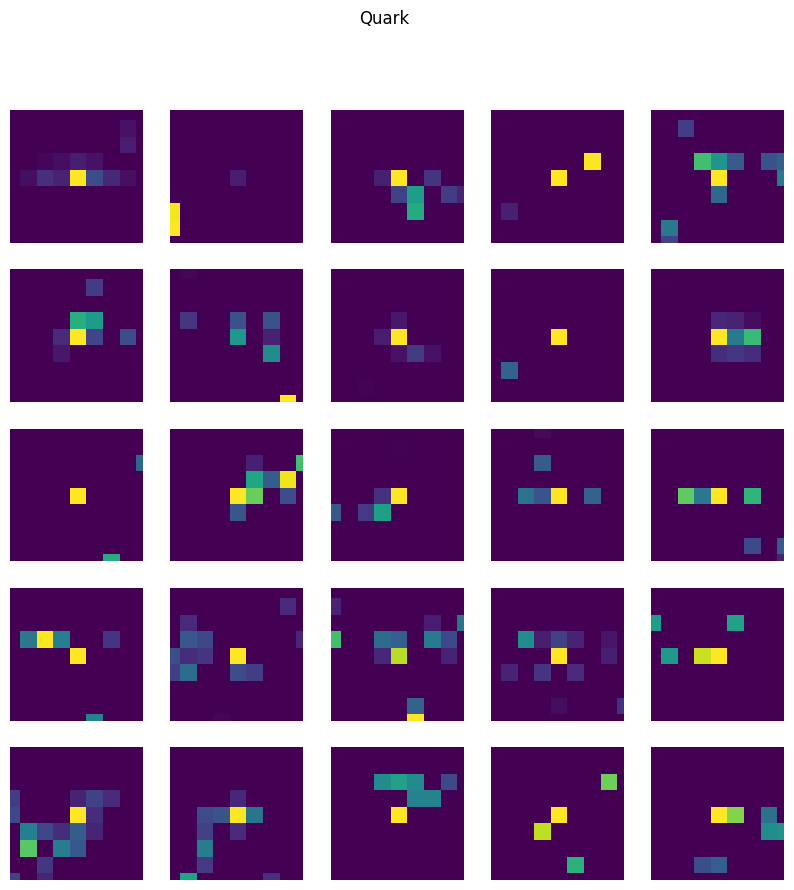

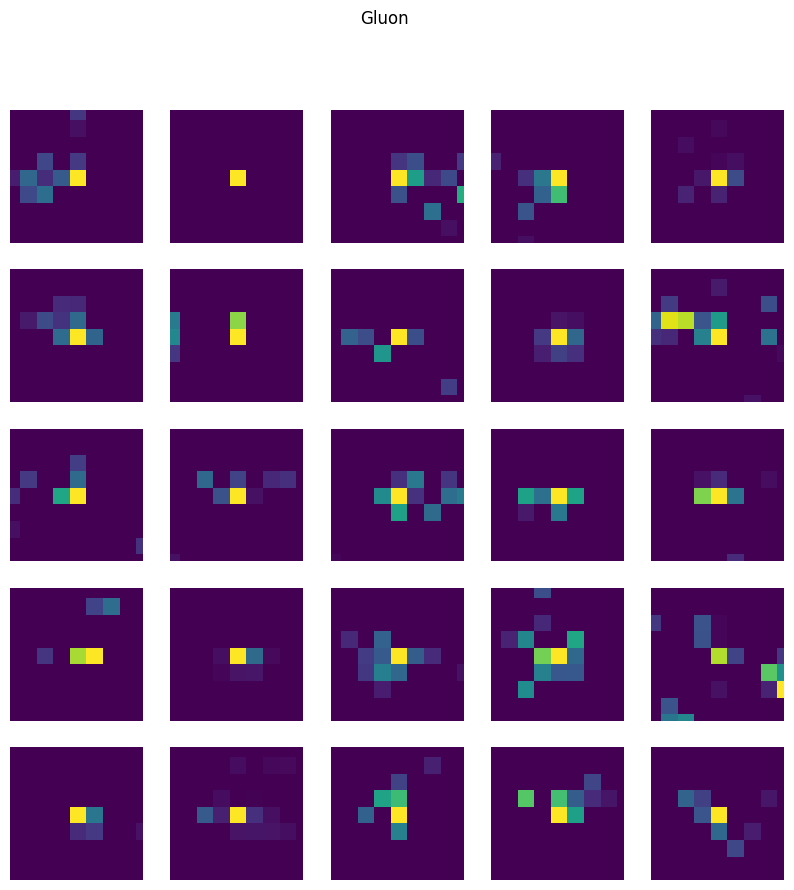

In [34]:
plot_image_grid(images_0, "Quark", 2)
plot_image_grid(images_1, "Gluon", 2)

In [35]:
# Create pairs of images and labels and saving npz of channel 4
def create_pairs(images, labels):
    pairs = []
    pair_labels = []

    num_classes = len(np.unique(labels)) # 2
    digit_indices = [np.where(labels == i)[0] for i in range(num_classes)]
    # print(digit_indices)

    for idx1 in range(len(images)):
        x1, label1 = images[idx1], labels[idx1]
        idx2 = np.random.choice(digit_indices[int(label1)])
        x2 = images[idx2]

        # if x1==x2, label set to 1
        pairs.append([x1, x2])
        pair_labels.append(1)

        # if x1!=x2, label set to 0
        label2 = (label1 + np.random.randint(1, num_classes)) % num_classes
        idx2 = np.random.choice(digit_indices[int(label2)])
        x2 = images[idx2]
        pairs.append([x1, x2])
        pair_labels.append(0)

    return np.array(pairs), np.array(pair_labels)

In [36]:
# preprocessed_4th_channel_images
x_train = add_fourth_channel(x_train)
x_test = add_fourth_channel(x_test)
pairs_train, labels_train = create_pairs(preprocess_all_images(x_train), y_train)
pairs_test, labels_test = create_pairs(preprocess_all_images(x_test), y_test)

print(f"After pair creation: pairs_train: {pairs_train.shape}, pairs_test: {pairs_test.shape}")
print(f"After pair creation: labels_train: {labels_train.shape}, labels_test: {labels_test.shape}")

After pair creation: pairs_train: (36000, 2, 40, 40), pairs_test: (4000, 2, 40, 40)
After pair creation: labels_train: (36000,), labels_test: (4000,)


In [37]:
pairs_train, labels_train = create_pairs(x_train[:,:,:,2], y_train)
pairs_test, labels_test = create_pairs(x_test[:,:,:,2], y_test)

print(f"After pair creation: pairs_train: {pairs_train.shape}, pairs_test: {pairs_test.shape}")
print(f"After pair creation: labels_train: {labels_train.shape}, labels_test: {labels_test.shape}")

After pair creation: pairs_train: (36000, 2, 40, 40), pairs_test: (4000, 2, 40, 40)
After pair creation: labels_train: (36000,), labels_test: (4000,)


In [38]:
def plot_sample_pairs(pairs, labels, shape, num_samples=5):
    plt.figure(figsize=(15, num_samples * 2))
    for i in range(num_samples):
        ax = plt.subplot(num_samples, 2, 2 * i + 1)
        plt.imshow(pairs[i, 0].reshape(shape, shape))
        ax.axis('off')

        ax = plt.subplot(num_samples, 2, 2 * i + 2)
        plt.imshow(pairs[i, 1].reshape(shape, shape))
        ax.axis('off')

        label = labels[i]
        plt.title(f'Sample: {i}, Label: {label}')

    plt.tight_layout()
    plt.show()

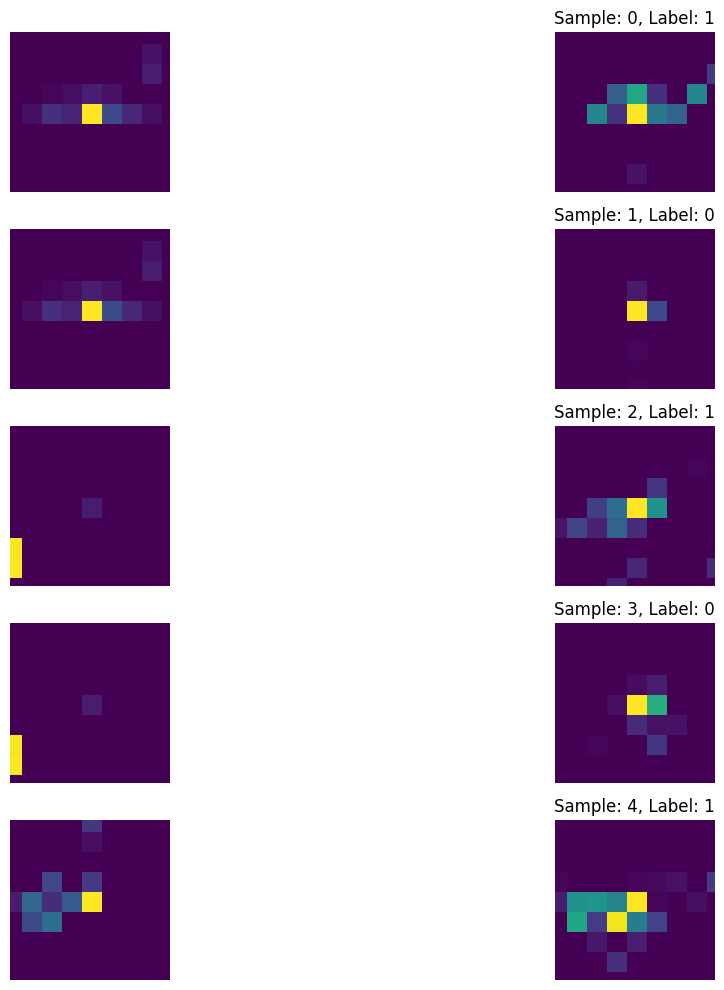

In [39]:
plot_sample_pairs(pairs_train, labels_train, shape=40, num_samples=5)

In [ ]:
np.savez_compressed('../../data/quark_gluon_dataset/qg_20000_pairs_c4.npz', **{
    'pairs_train': pairs_train,
    'labels_train':labels_train,
    'pairs_test':pairs_test,
    'labels_test':labels_test
})

In [ ]:
plt.imshow(preprocessed_4th_channel_images[12])